In [1]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import netCDF4
%matplotlib inline
import xarray as xr
from scipy.interpolate import splev

In [2]:
# First make figures of h20-clim and h20-anom
ds  = xr.open_dataset('data/h20clim.nc')

pcoef=np.loadtxt('p2-coeffs.txt')
h20O = (pcoef[0]*ds.h20 + pcoef[1])*ds.h20 + pcoef[2]

npzfile = np.load('spline.npz')
knots=npzfile['knots']
coeffs=npzfile['coeffs']
tck = [knots,coeffs,3]
Td = splev(h20O, tck, der=0, ext=0)

# Define the new Dataset
dsc = xr.Dataset({'X': ('X', ds.X), 'Y': ('Y', ds.Y), 'Td': (['Y','X'], Td)})
dsc.X.attrs = ds.X.attrs; dsc.Y.attrs = ds.Y.attrs
dsc.Td.attrs = [('units','Celsius')]
dsc.to_netcdf('data/Td-clim.nc')

dsc_eq = dsc.sel(Y=slice(-10,10))

# For comparison, plot ORAs4 T50 directly
choose_lon   = 'X/120/280/RANGE'
choose_lat   = 'Y/-20.0/20.0/RANGE'
stype = 'clim'; var = 'T50'
url2 = 'http://kage.ldeo.columbia.edu:81/SOURCES/.LDEO/.ClimateGroup/.PROJECTS/'\
           +'.TCC/.ORAs4/.'+var+'-'+stype+'.nc/.'+var\
           +'/'+choose_lat+'/'+choose_lon+'/dods'
       
dso = xr.open_dataset(url2)
dso_eq = dso.sel(Y=slice(-10,10))
dso.to_netcdf('data/TdO-clim.nc')

[]

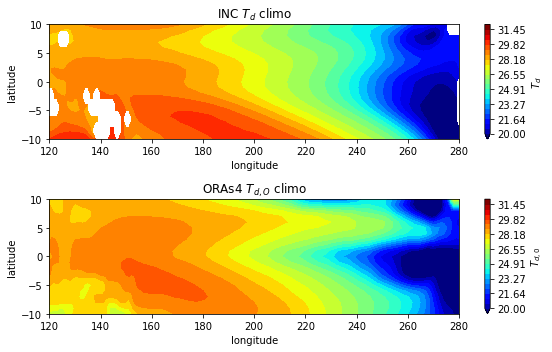

In [4]:
# First make figures of h20 - INC version
plt.figure(figsize=(8,5))

plt.subplot(211)
dp = dsc_eq.Td.plot.contourf(levels=23,cmap="jet",vmin=20,vmax=32,add_colorbar=0)
plt.title(r'INC $T_d$ climo')
plt.ylabel('latitude');plt.xlabel('longitude')
cbar = plt.colorbar(dp)
cbar.ax.set_ylabel(r'$T_d$', rotation=90) 
plt.subplot(212)
dp=dso_eq.T50.plot.contourf(levels=23,cmap="jet",vmin=20,vmax=32,add_colorbar=0)
plt.title(r'ORAs4 $T_{d,O}$ climo')
plt.ylabel('latitude');plt.xlabel('longitude')
cbar = plt.colorbar(dp)
cbar.ax.set_ylabel(r'$T_{d,0}$', rotation=90) 

plt.tight_layout()
plt.savefig('Td-clim.eps', format='eps', dpi=1000)
plt.plot()

[]

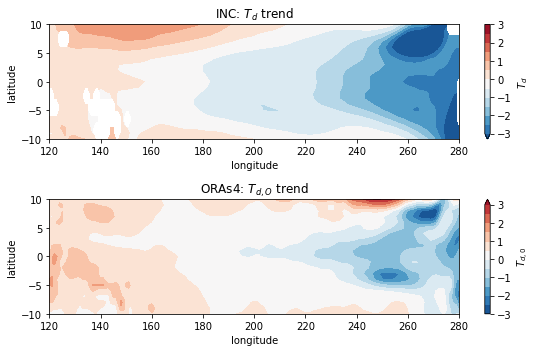

In [4]:
dsa  = xr.open_dataset('data/h20trend.nc')

hp = ds.h20+dsa.h20/2
hm = ds.h20-dsa.h20/2
hOp = (pcoef[0]*hp + pcoef[1])*hp + pcoef[2]
hOm = (pcoef[0]*hm + pcoef[1])*hm + pcoef[2]

Tdp = splev(hOp, tck, der=0, ext=0)
Tdm = splev(hOm, tck, der=0, ext=0)
Tt = Tdp - Tdm
# Define the new Dataset
dst = xr.Dataset({'X': ('X', ds.X), 'Y': ('Y', ds.Y), 'Td': (['Y','X'], Tt)})
dst.X.attrs = ds.X.attrs; dst.Y.attrs = ds.Y.attrs
dst.Td.attrs = [('units','Celsius')]
dst.to_netcdf('data/Td-trend.nc')
dst_eq = dst.sel(Y=slice(-10,10))

# For comparison, plot ORAs4 T50 directly
stype = 'trend'
var = 'T50'
url2t = 'http://kage.ldeo.columbia.edu:81/SOURCES/.LDEO/.ClimateGroup/.PROJECTS/'\
           +'.TCC/.ORAs4/.'+var+'-'+stype+'.nc/.'+var\
           +'/'+choose_lat+'/'+choose_lon+'/dods'
dsot = xr.open_dataset(url2t)
dsot_eq = dsot.sel(Y=slice(-10,10)) 
dsot.to_netcdf('data/TdO-trend.nc')
plt.figure(figsize=(8,5))

plt.subplot(211)
dp = dst_eq.Td.plot.contourf(levels=13,cmap="RdBu_r",vmin=-3,vmax=3,add_colorbar=0)
plt.title(r'INC: $T_d$ trend')
plt.ylabel('latitude');plt.xlabel('longitude')
cbar = plt.colorbar(dp)
cbar.ax.set_ylabel(r'$T_d$', rotation=90) 
plt.subplot(212)
dp=dsot_eq.T50.plot.contourf(levels=13,cmap="RdBu_r",vmin=-3,vmax=3,add_colorbar=0)
plt.title(r'ORAs4: $T_{d,O}$ trend')
plt.ylabel('latitude');plt.xlabel('longitude')
cbar = plt.colorbar(dp)
cbar.ax.set_ylabel(r'$T_{d,0}$', rotation=90) 

plt.tight_layout()
plt.savefig('Td-trend.eps', format='eps', dpi=1000)
plt.plot()